442 10


Text(0, 0.5, 'Prediction')

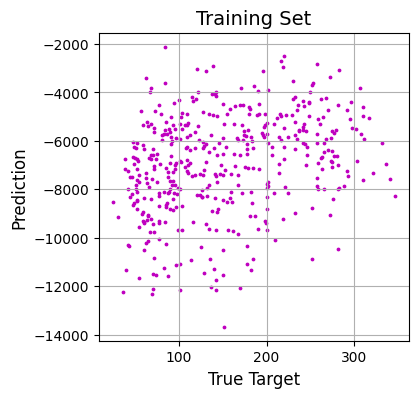

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
diabetes = datasets.load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target
def gaussian(x, u, sigma):
  return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))
N, p = X.shape
print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)
# Construct the design matrix
#
for i in range(N):
  for j in range(M):
    U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

442 10


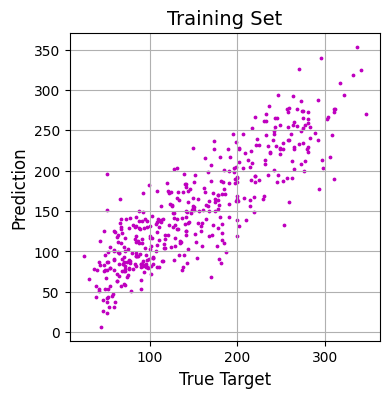

In [ ]:
# Normalize each feature of the input data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Your existing code continues below...

def gaussian(x, u, sigma):
    return np.exp(-0.5 * np.linalg.norm(x - u) / sigma)

N, p = X_normalized.shape
print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N, M))
# Basis function locations at random
#
C = np.random.randn(M, p)
# Basis function range as distance between two random data
#
x1 = X_normalized[np.floor(np.random.rand() * N).astype(int), :]
x2 = X_normalized[np.floor(np.random.rand() * N).astype(int), :]
sigma = np.linalg.norm(x1 - x2)
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i, j] = gaussian(X_normalized[i, :], C[j, :], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.show()


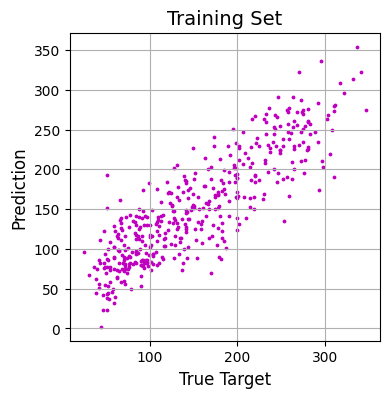

In [ ]:
# Calculate pairwise distances between data points
pairwise_distances = np.zeros(N*(N-1)//2)
index = 0
for i in range(N):
    for j in range(i+1, N):
        pairwise_distances[index] = np.linalg.norm(X_normalized[i] - X_normalized[j])
        index += 1

# Calculate the average of several pairwise distances
num_distances = 10  # You can adjust this number as needed
average_distance = np.mean(np.random.choice(pairwise_distances, num_distances))

# Use the average distance as the width parameter σ
sigma = average_distance

# Construct the design matrix with the updated σ
U = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        U[i, j] = gaussian(X_normalized[i, :], C[j, :], sigma)

# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


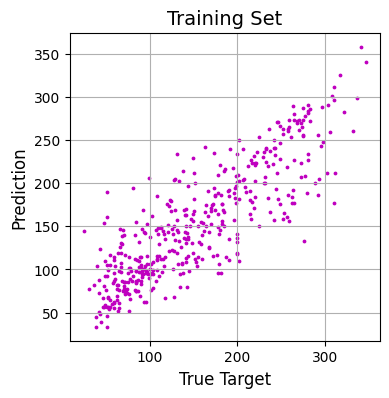

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

diabetes = datasets.load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target

def gaussian(x, u, sigma):
    return np.exp(-0.5 * np.linalg.norm(x - u) / sigma)

# Normalize each feature of the input data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Perform K-means clustering with K = M
M = 200  # Number of basis functions
kmeans = KMeans(n_clusters=M, random_state=0)
kmeans.fit(X_normalized)
C = kmeans.cluster_centers_

# Construct the design matrix
N, p = X_normalized.shape
U = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        U[i, j] = gaussian(X_normalized[i, :], C[j, :], sigma)

# Pseudo inverse solution for linear part
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
yh = U @ l

# Plotting
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean Squared Error on Test Set: 2574.99080225848


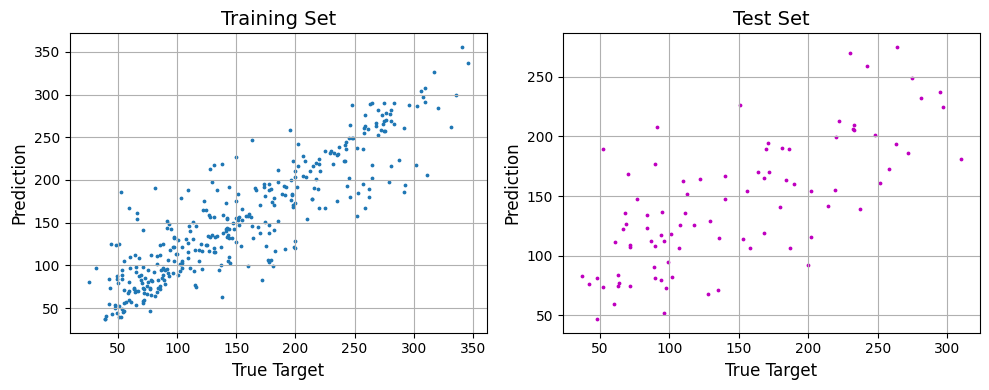

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target

def gaussian(x, u, sigma):
    return np.exp(-0.5 * np.linalg.norm(x - u) / sigma)

# Normalize each feature of the input data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Perform K-means clustering with K = M
M = 200  # Number of basis functions
kmeans = KMeans(n_clusters=M, random_state=0)
kmeans.fit(X_train)
C = kmeans.cluster_centers_

# Construct the design matrix for training set
N_train, p = X_train.shape
U_train = np.zeros((N_train, M))
for i in range(N_train):
    for j in range(M):
        U_train[i, j] = gaussian(X_train[i, :], C[j, :], sigma)

# Pseudo inverse solution for linear part
l = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

# Construct the design matrix for test set
N_test = X_test.shape[0]
U_test = np.zeros((N_test, M))
for i in range(N_test):
    for j in range(M):
        U_test[i, j] = gaussian(X_test[i, :], C[j, :], sigma)

# Predicted values on training and test data
yh_train = U_train @ l
yh_test = U_test @ l

# Calculate Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, yh_test)
print("Mean Squared Error on Test Set:", mse_test)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot for training set
ax1.scatter(y_train, yh_train, s=3)
ax1.grid(True)
ax1.set_title("Training Set", fontsize=14)
ax1.set_xlabel("True Target", fontsize=12)
ax1.set_ylabel("Prediction", fontsize=12)

# Plot for test set
ax2.scatter(y_test, yh_test, c='m', s=3)
ax2.grid(True)
ax2.set_title("Test Set", fontsize=14)
ax2.set_xlabel("True Target", fontsize=12)
ax2.set_ylabel("Prediction", fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

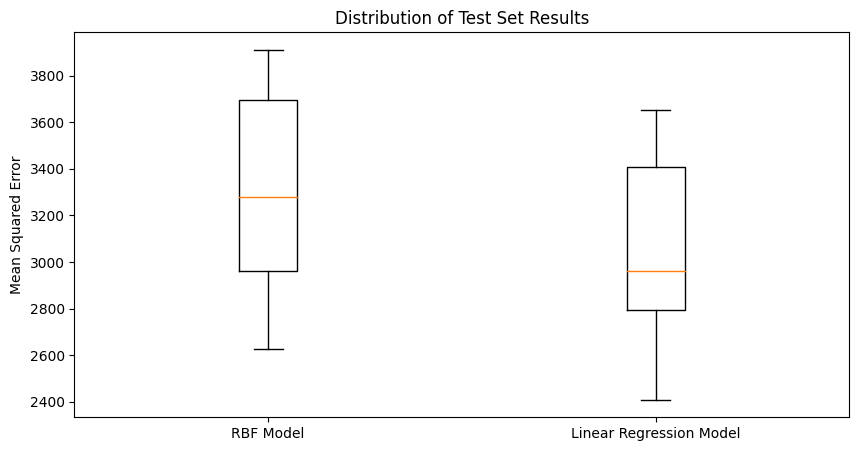

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

def gaussian(x, u, sigma):
    return np.exp(-0.5 * np.linalg.norm(x - u) / sigma)

# Normalize each feature of the input data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Perform ten-fold cross-validation for both models
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_rbf = []
mse_scores_linear = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RBF Model
    M = 200  # Number of basis functions
    kmeans = KMeans(n_clusters=M, random_state=0)
    kmeans.fit(X_train)
    C = kmeans.cluster_centers_

    # Construct the design matrix for training set
    N_train, p = X_train.shape
    U_train = np.zeros((N_train, M))
    for i in range(N_train):
        for j in range(M):
            U_train[i, j] = gaussian(X_train[i, :], C[j, :], sigma)

    # Pseudo inverse solution for linear part
    l_rbf = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

    # Construct the design matrix for test set
    N_test = X_test.shape[0]
    U_test = np.zeros((N_test, M))
    for i in range(N_test):
        for j in range(M):
            U_test[i, j] = gaussian(X_test[i, :], C[j, :], sigma)

    # Predicted values on test data
    yh_test_rbf = U_test @ l_rbf

    # Calculate Mean Squared Error on the test set for RBF model
    mse_fold_rbf = mean_squared_error(y_test, yh_test_rbf)
    mse_scores_rbf.append(mse_fold_rbf)

    # Linear Regression Model
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Predicted values on test data for Linear Regression model
    yh_test_linear = model_linear.predict(X_test)

    # Calculate Mean Squared Error on the test set for Linear Regression model
    mse_fold_linear = mean_squared_error(y_test, yh_test_linear)
    mse_scores_linear.append(mse_fold_linear)

# Plot boxplots side by side for both models
plt.figure(figsize=(10, 5))
plt.boxplot([mse_scores_rbf, mse_scores_linear], labels=['RBF Model', 'Linear Regression Model'])
plt.title('Distribution of Test Set Results')
plt.ylabel('Mean Squared Error')
# plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

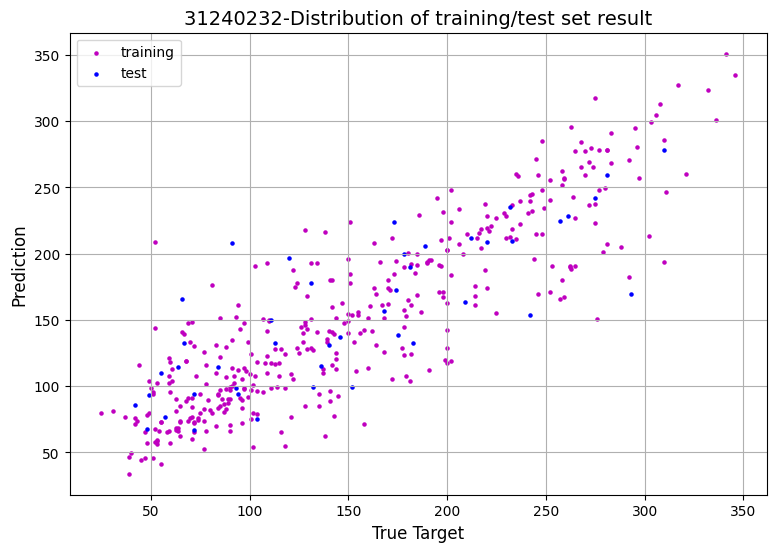

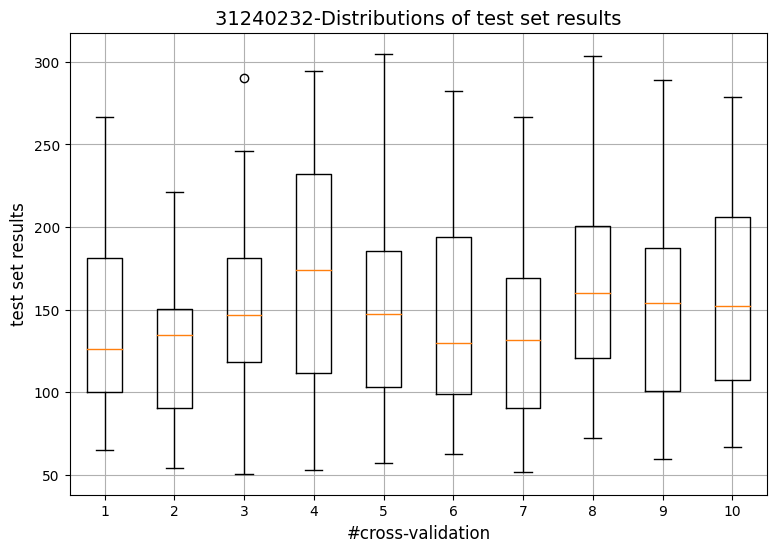

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 19 23:24:14 2019

@author: taebe
"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.model_selection import KFold
# Gaussian
#
def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

diabetes = datasets.load_diabetes()
X = diabetes.data # input data
y = diabetes.target # target
# -->Normalize each feature of the input data to have a
# mean of 0 and standard deviation of 1
#
Xnorm = (X-np.min(X)) / (np.max(X)-np.min(X)) # good

# Space for design matrix
#
M = 200
S = 10
# K-folds cross validation
#
kf = KFold(n_splits=S)
error_tr = list()
error_te = list()
lamda = list()
ytt = list()
for tr_idx, te_idx in kf.split(X):
    Xntr, Xnte = Xnorm[tr_idx], Xnorm[te_idx]
    ytr, yte = y[tr_idx], y[te_idx]

    N, p = Xntr.shape
    Nt = Xnte.shape[0]
    Utr = np.zeros((N,M)) # row, 200
    Ute = np.zeros((Nt,M)) # row, 200

    Ck = KMeans(n_clusters=M, random_state=0).fit(Xntr) # Why divided into M ?
    C = Ck.cluster_centers_ # 200x10

    sigtmp = np.zeros(M) # good
    for i in range(M):
        x1 = Xntr[np.floor(np.random.rand()*N).astype(int), :]
        x2 = Xntr[np.floor(np.random.rand()*N).astype(int), :]
        sigtmp[i] = np.linalg.norm(x1-x2) # sqrt(sum((x1-x2)^2))
    sigma = np.mean(sigtmp)

    for i in range(N):
        for j in range(M):
            Utr[i,j] = gaussian(Xntr[i,:], C[j,:], sigma) # good

    for i in range(Nt):
        for j in range(M):
            Ute[i,j] = gaussian(Xnte[i,:], C[j,:], sigma) # good

    l = np.linalg.inv(Utr.T @ Utr) @ Utr.T @ ytr

    yh = Utr @ l
    yt = Ute @ l

    error_tr.append(np.sum(np.square(ytr-yh)))
    error_te.append(np.sum(np.square(yte-yt)))
    lamda.append(l)
    ytt.append(yt)

# print("min idx: ", np.argmin(error_te), "lamda: ", lamda[np.argmin(error_te)])



#Predicted values on training data

fig = plt.figure(figsize=(9,6))
plt.scatter(ytr, yh, c='m', s=5)
plt.scatter(yte, yt, c='b', s=5)
plt.grid(True)
plt.title("31240232-Distribution of training/test set result", fontsize=14)
plt.xlabel("True Target", fontsize=12)
plt.ylabel("Prediction", fontsize=12)
plt.gca().legend(('training','test'))
plt.savefig('1-min_lamda_result.png')

fig = plt.figure(figsize=(9,6))
plt.boxplot(ytt)
plt.grid(True)
plt.title("31240232-Distributions of test set results", fontsize=14)
plt.xlabel("#cross-validation", fontsize=12)
plt.ylabel("test set results", fontsize=12)
plt.savefig('1-boxplot_sbs.png')

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='rbf')
svclassifier.fit(Utr, yh.astype('int'))

y_pred = svclassifier.predict(Ute)
# print(confusion_matrix(yte, y_pred))
# print(classification_report(yte, y_pred))

Text(0.5, 1.0, 'Test Data Distributions')

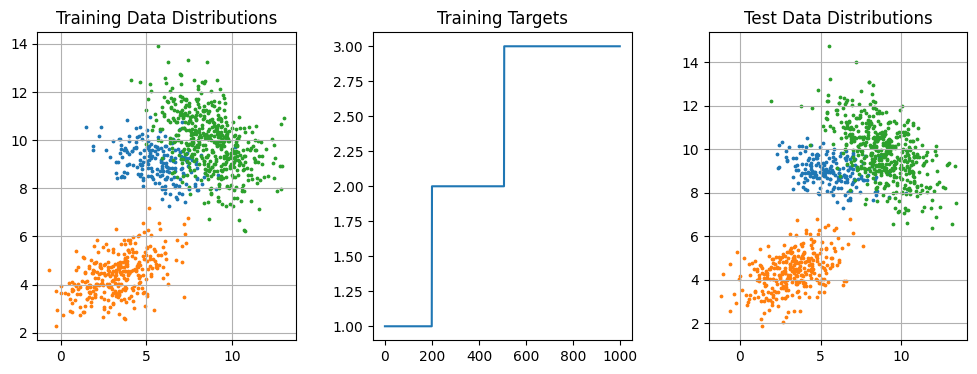

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def genGaussianSamples(N, m, C):
  A = np.linalg.cholesky(C)
  U = np.random.randn(N,2)
  return(U @ A.T + m)

NClasses = 3

# Priors
#

w = np.random.rand(NClasses)
w = w / np.sum(w)
N = 1000 # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)
Scale = 10
Means = Scale*np.random.rand(NClasses, 2)

from sklearn.datasets import make_spd_matrix

CovMatrices = np.zeros((NClasses,2,2))

for j in range(NClasses):
  CovMatrices[j,:,:] = make_spd_matrix(2)

AllData_train = list()

for j in range(NClasses):
  AllData_train.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))

X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))

for j in range(NClasses-1):
  Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
  X_train = np.append(X_train, Xj, axis=0)
  yj = (j+2)*np.ones((NPrior[j+1], 1))
  y_train = np.append(y_train, yj)

AllData_test = list()

for j in range(NClasses):
  AllData_test.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))

X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))

for j in range(NClasses-1):
  Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
  X_test = np.append(X_test, Xj, axis=0)
  yj = (j+2)*np.ones((NPrior[j+1], 1))
  y_test = np.append(y_test, yj)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.subplots_adjust(wspace=0.3)

for j in range(NClasses):
  Xplt = AllData_train[j]
  ax[0].scatter(Xplt[:,0], Xplt[:,1], s=3)

ax[0].grid(True)
ax[0].set_title("Training Data Distributions")
ax[1].plot(y_train)
ax[1].set_title("Training Targets")

for j in range(NClasses):
  Xplt = AllData_test[j]
  ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)

ax[2].grid(True)
ax[2].set_title("Test Data Distributions")

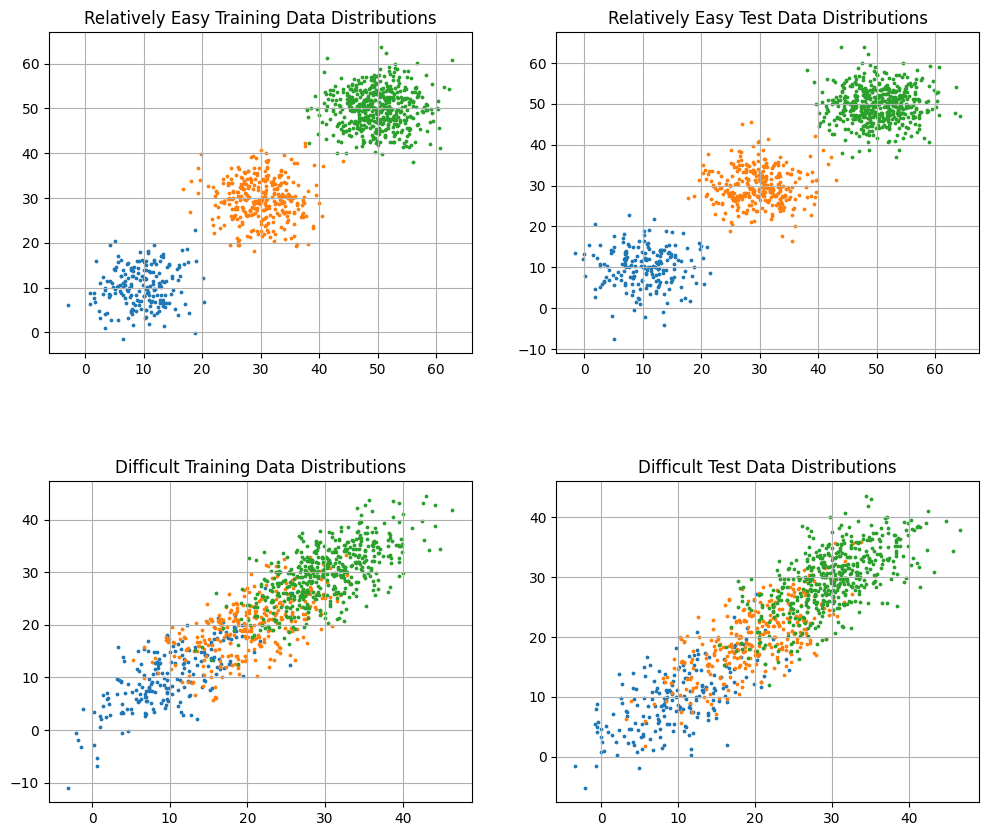

In [ ]:
# Parameters for relatively easy problem
means_easy = np.array([[10, 10], [30, 30], [50, 50]])
cov_matrices_easy = np.array([[[20, 0], [0, 20]], [[20, 0], [0, 20]], [[20, 0], [0, 20]]])

# Parameters for difficult problem
means_difficult = np.array([[10, 10], [20, 20], [30, 30]])
cov_matrices_difficult = np.array([[[30, 20], [20, 30]], [[30, 20], [20, 30]], [[30, 20], [20, 30]]])

# Generating data for relatively easy problem
AllData_train_easy = [genGaussianSamples(NPrior[j], means_easy[j,:], cov_matrices_easy[j,:,:]) for j in range(NClasses)]
AllData_test_easy = [genGaussianSamples(NPrior[j], means_easy[j,:], cov_matrices_easy[j,:,:]) for j in range(NClasses)]

# Generating data for difficult problem
AllData_train_difficult = [genGaussianSamples(NPrior[j], means_difficult[j,:], cov_matrices_difficult[j,:,:]) for j in range(NClasses)]
AllData_test_difficult = [genGaussianSamples(NPrior[j], means_difficult[j,:], cov_matrices_difficult[j,:,:]) for j in range(NClasses)]

# Plotting data distributions for both problems
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot for relatively easy problem
for j in range(NClasses):
    axs[0, 0].scatter(AllData_train_easy[j][:,0], AllData_train_easy[j][:,1], s=3)
axs[0, 0].grid(True)
axs[0, 0].set_title("Relatively Easy Training Data Distributions")

for j in range(NClasses):
    axs[0, 1].scatter(AllData_test_easy[j][:,0], AllData_test_easy[j][:,1], s=3)
axs[0, 1].grid(True)
axs[0, 1].set_title("Relatively Easy Test Data Distributions")

# Plot for difficult problem
for j in range(NClasses):
    axs[1, 0].scatter(AllData_train_difficult[j][:,0], AllData_train_difficult[j][:,1], s=3)
axs[1, 0].grid(True)
axs[1, 0].set_title("Difficult Training Data Distributions")

for j in range(NClasses):
    axs[1, 1].scatter(AllData_test_difficult[j][:,0], AllData_test_difficult[j][:,1], s=3)
axs[1, 1].grid(True)
axs[1, 1].set_title("Difficult Test Data Distributions")

plt.show()


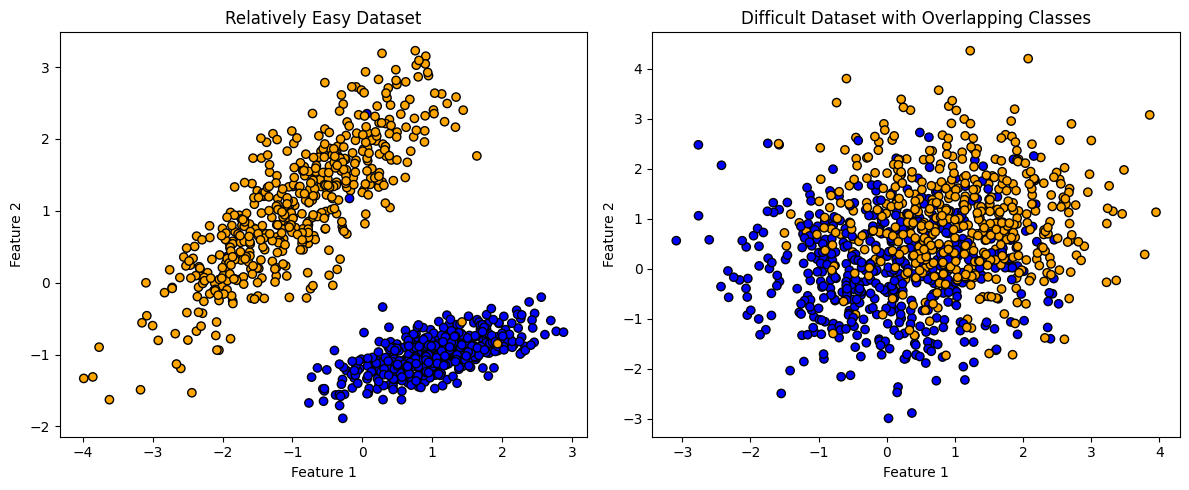

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Define parameters
n_samples = 1000
n_features = 2
class_overlap = 0.2  # Adjust the overlap percentage

X_easy, y_easy = make_classification(n_samples=n_samples, n_features=n_features, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=43)

# Calculate the number of samples required to balance the classes
n_samples_per_class = int(n_samples / 2)

# Generate the difficult dataset with overlapping classes
# We'll create two Gaussian distributions for each class and then introduce overlap between them
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]  # covariance matrix for class 1

mean2 = [1, 1]
cov2 = [[1, 0], [0, 1]]  # covariance matrix for class 2

X_difficult_1 = np.random.multivariate_normal(mean1, cov1, n_samples_per_class)
X_difficult_2 = np.random.multivariate_normal(mean2, cov2, n_samples_per_class)

# Introduce overlap between the classes
overlap_samples = int(n_samples_per_class * class_overlap)
X_difficult_overlap = np.concatenate((X_difficult_1[:overlap_samples], X_difficult_2[:overlap_samples]))
y_difficult_overlap = np.concatenate((np.zeros(overlap_samples), np.ones(overlap_samples)))

X_difficult_no_overlap = np.concatenate((X_difficult_1[overlap_samples:], X_difficult_2[overlap_samples:]))
y_difficult_no_overlap = np.concatenate((np.zeros(n_samples_per_class - overlap_samples), np.ones(n_samples_per_class - overlap_samples)))

# Combine the overlapping and non-overlapping samples to form the balanced difficult dataset
X_difficult = np.concatenate((X_difficult_overlap, X_difficult_no_overlap))
y_difficult = np.concatenate((y_difficult_overlap, y_difficult_no_overlap))

# Plotting the datasets with custom colors for the dots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_easy[:, 0], X_easy[:, 1], c=['blue' if label == 0 else 'orange' for label in y_easy], edgecolors='k')
plt.title('Relatively Easy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_difficult[:, 0], X_difficult[:, 1], c=['blue' if label == 0 else 'orange' for label in y_difficult], edgecolors='k')
plt.title('Difficult Dataset with Overlapping Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


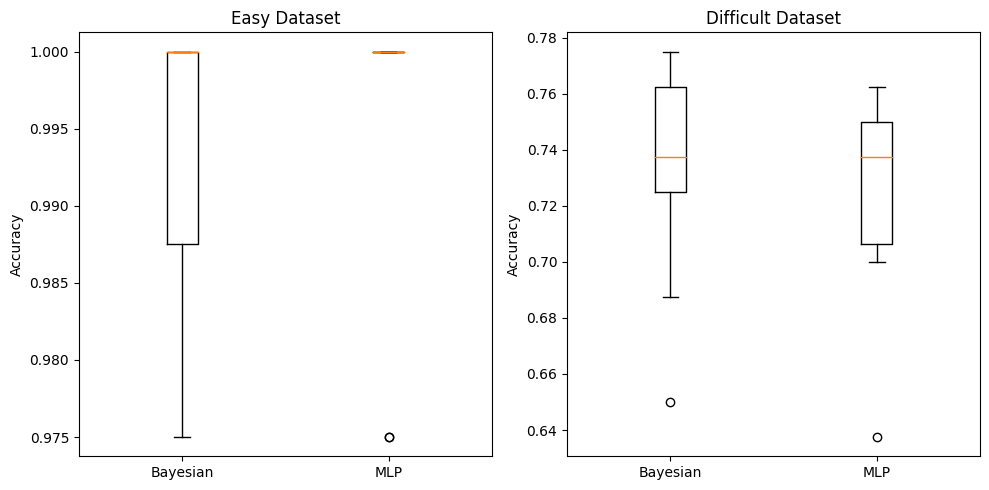

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Step 2: Split the data into training and test sets
X_easy_train, X_easy_test, y_easy_train, y_easy_test = train_test_split(X_easy, y_easy, test_size=0.2, random_state=43)
X_difficult_train, X_difficult_test, y_difficult_train, y_difficult_test = train_test_split(X_difficult, y_difficult, test_size=0.2, random_state=42)

# Step 3: Implement classifiers
# Bayesian classifier
bayesian_classifier = GaussianNB()

# MLP classifier
mlp_classifier = mlp_classifier = MLPClassifier()


# Step 4: Compare performances using ten-fold cross-validation
# Function to perform cross-validation and return scores
def cross_validation_scores(classifier, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    return scores

# Cross-validation scores for easy dataset
bayesian_scores_easy = cross_validation_scores(bayesian_classifier, X_easy_train, y_easy_train)
mlp_scores_easy = cross_validation_scores(mlp_classifier, X_easy_train, y_easy_train)

# Cross-validation scores for difficult dataset
bayesian_scores_difficult = cross_validation_scores(bayesian_classifier, X_difficult_train, y_difficult_train)
mlp_scores_difficult = cross_validation_scores(mlp_classifier, X_difficult_train, y_difficult_train)

# Plotting boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([bayesian_scores_easy, mlp_scores_easy], labels=['Bayesian', 'MLP'])
plt.title('Easy Dataset')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.boxplot([bayesian_scores_difficult, mlp_scores_difficult], labels=['Bayesian', 'MLP'])
plt.title('Difficult Dataset')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


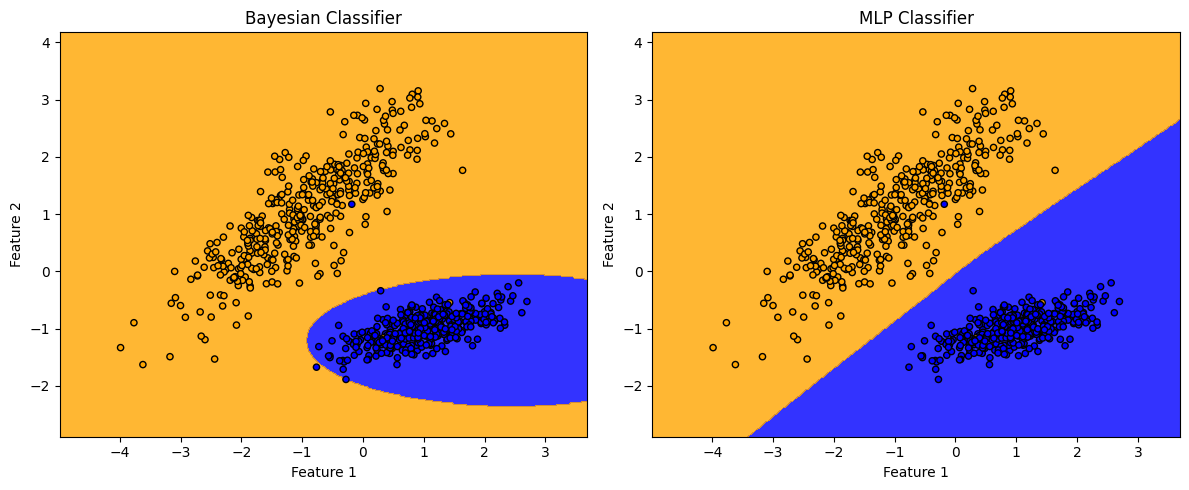

In [41]:
# Fit classifiers on the entire training set
bayesian_classifier.fit(X_easy_train, y_easy_train)
mlp_classifier.fit(X_easy_train, y_easy_train)

# Define colors for contours
colors = ['blue', 'orange']

# Plotting decision boundaries with the same colors as the scatter plots
plt.figure(figsize=(12, 5))

# Plot decision boundary for Bayesian classifier
plt.subplot(1, 2, 1)
x_min, x_max = X_easy_train[:, 0].min() - 1, X_easy_train[:, 0].max() + 1
y_min, y_max = X_easy_train[:, 1].min() - 1, X_easy_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contour_levels = np.linspace(Z.min(), Z.max(), len(colors) + 1)  # Define contour levels
plt.contourf(xx, yy, Z, alpha=0.8, levels=contour_levels, colors=colors)  # Use specified colors for contours
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=['blue' if label == 0 else 'orange' for label in y_easy_train], s=20, edgecolors='k')
plt.title('Bayesian Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for MLP classifier
plt.subplot(1, 2, 2)
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contour_levels = np.linspace(Z.min(), Z.max(), len(colors) + 1)  # Define contour levels
plt.contourf(xx, yy, Z, alpha=0.8, levels=contour_levels, colors=colors)  # Use specified colors for contours
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=['blue' if label == 0 else 'orange' for label in y_easy_train], s=20, edgecolors='k')
plt.title('MLP Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


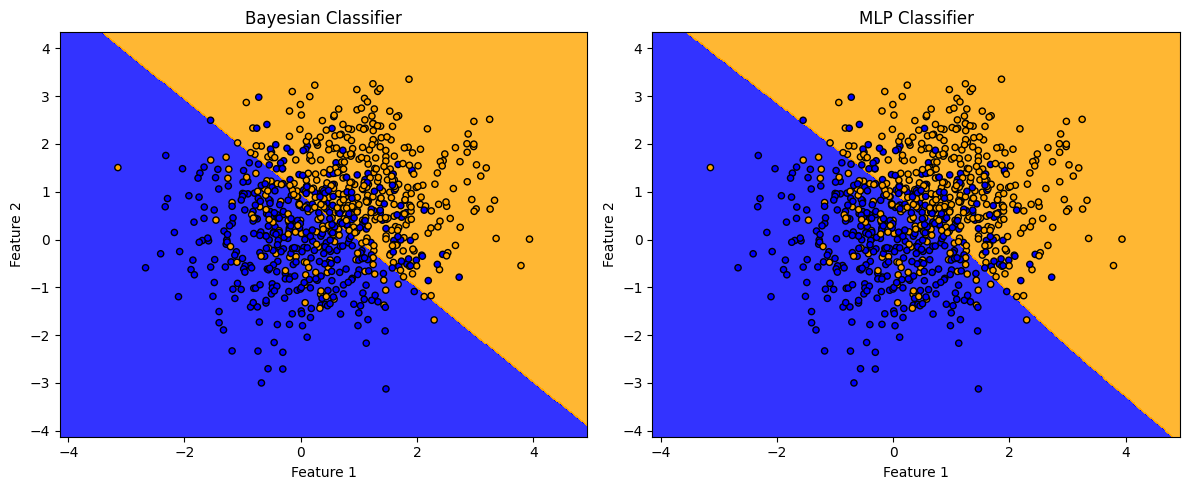

In [40]:
# Fit classifiers on the entire training set
bayesian_classifier.fit(X_difficult_train, y_difficult_train)
mlp_classifier.fit(X_difficult_train, y_difficult_train)

# Define a color map
from matplotlib.colors import ListedColormap
colors = ['blue', 'orange']
cmap = ListedColormap(colors)

# Plotting decision boundaries with the same colors as the scatter plots
plt.figure(figsize=(12, 5))

# Plot decision boundary for Bayesian classifier
plt.subplot(1, 2, 1)
x_min, x_max = X_difficult_train[:, 0].min() - 1, X_difficult_train[:, 0].max() + 1
y_min, y_max = X_difficult_train[:, 1].min() - 1, X_difficult_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)  # Use specified colors for contours
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=['blue' if label == 0 else 'orange' for label in y_difficult_train], s=20, edgecolors='k')
plt.title('Bayesian Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for MLP classifier
plt.subplot(1, 2, 2)
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)  # Use specified colors for contours
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=['blue' if label == 0 else 'orange' for label in y_difficult_train], s=20, edgecolors='k')
plt.title('MLP Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


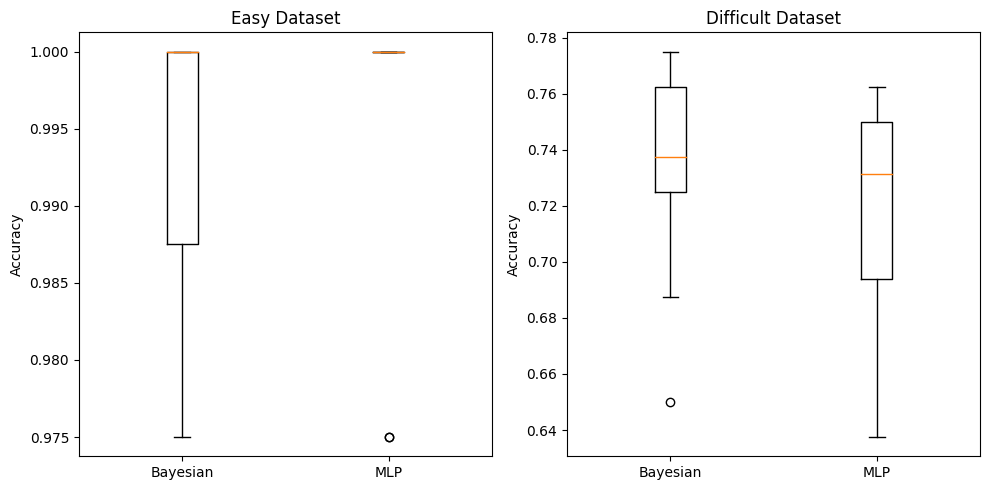

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Step 3: Implement classifiers
# Bayesian classifier
bayesian_classifier = GaussianNB()

# MLP classifier
# MLP classifier
mlp_classifier = mlp_classifier = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    momentum=0.9,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=None,
    shuffle=True,
    solver='adam',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False
)


# Step 4: Compare performances using ten-fold cross-validation
# Function to perform cross-validation and return scores
def cross_validation_scores(classifier, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    return scores

# Cross-validation scores for easy dataset
bayesian_scores_easy = cross_validation_scores(bayesian_classifier, X_easy_train, y_easy_train)
mlp_scores_easy = cross_validation_scores(mlp_classifier, X_easy_train, y_easy_train)

# Cross-validation scores for difficult dataset
bayesian_scores_difficult = cross_validation_scores(bayesian_classifier, X_difficult_train, y_difficult_train)
mlp_scores_difficult = cross_validation_scores(mlp_classifier, X_difficult_train, y_difficult_train)

# Plotting boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([bayesian_scores_easy, mlp_scores_easy], labels=['Bayesian', 'MLP'])
plt.title('Easy Dataset')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.boxplot([bayesian_scores_difficult, mlp_scores_difficult], labels=['Bayesian', 'MLP'])
plt.title('Difficult Dataset')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


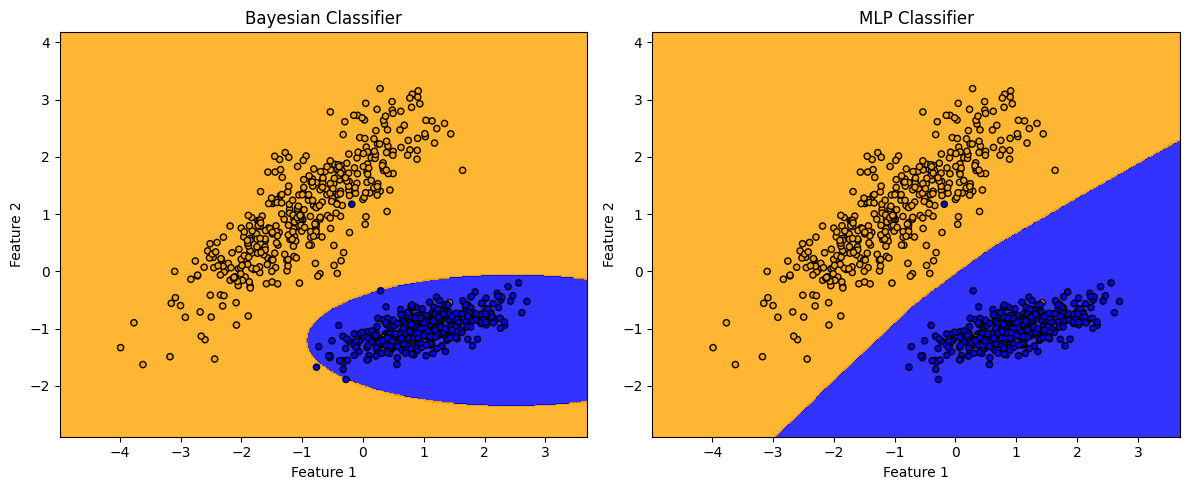

In [38]:
# Define colormap
colors = ['blue', 'orange']
cmap = ListedColormap(colors)

# Fit classifiers on the entire training set
bayesian_classifier.fit(X_easy_train, y_easy_train)
mlp_classifier.fit(X_easy_train, y_easy_train)

# Plotting decision boundaries
plt.figure(figsize=(12, 5))

# Plot decision boundary for Bayesian classifier
plt.subplot(1, 2, 1)
x_min, x_max = X_easy_train[:, 0].min() - 1, X_easy_train[:, 0].max() + 1
y_min, y_max = X_easy_train[:, 1].min() - 1, X_easy_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train, cmap=cmap, s=20, edgecolors='k')
plt.title('Bayesian Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for MLP classifier
plt.subplot(1, 2, 2)
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train, cmap=cmap, s=20, edgecolors='k')
plt.title('MLP Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


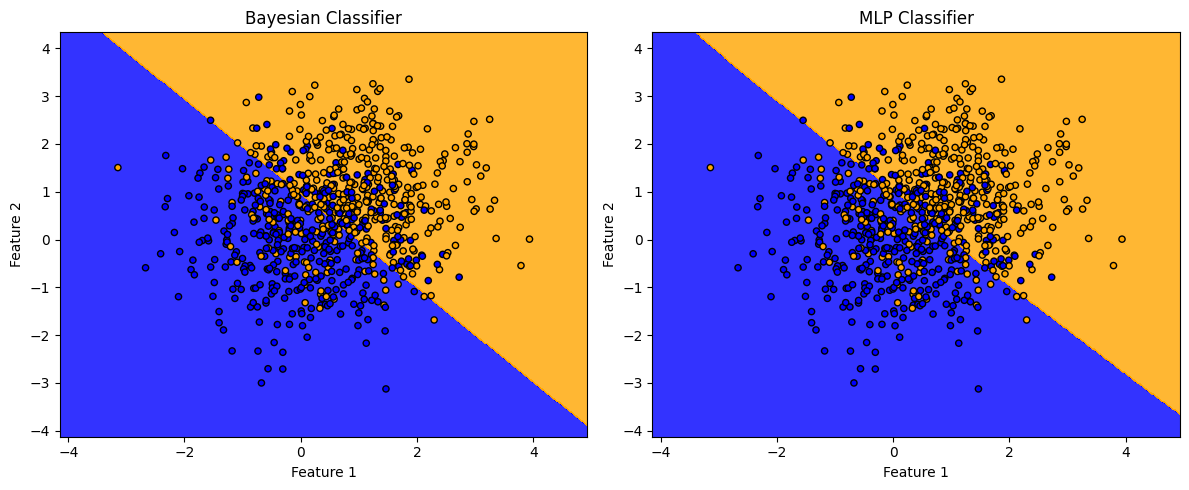

In [43]:
# Define colormap
colors = ['blue', 'orange']
cmap = ListedColormap(colors)

# Fit classifiers on the entire training set
bayesian_classifier.fit(X_difficult_train, y_difficult_train)
mlp_classifier.fit(X_difficult_train, y_difficult_train)

# Plotting decision boundaries
plt.figure(figsize=(12, 5))

# Plot decision boundary for Bayesian classifier
plt.subplot(1, 2, 1)
x_min, x_max = X_difficult_train[:, 0].min() - 1, X_difficult_train[:, 0].max() + 1
y_min, y_max = X_difficult_train[:, 1].min() - 1, X_difficult_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=y_difficult_train, cmap=cmap, s=20, edgecolors='k')
plt.title('Bayesian Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for MLP classifier
plt.subplot(1, 2, 2)
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=y_difficult_train, cmap=cmap, s=20, edgecolors='k')
plt.title('MLP Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


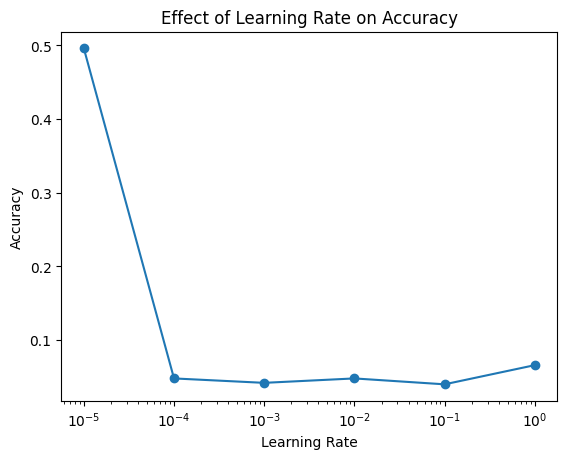

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

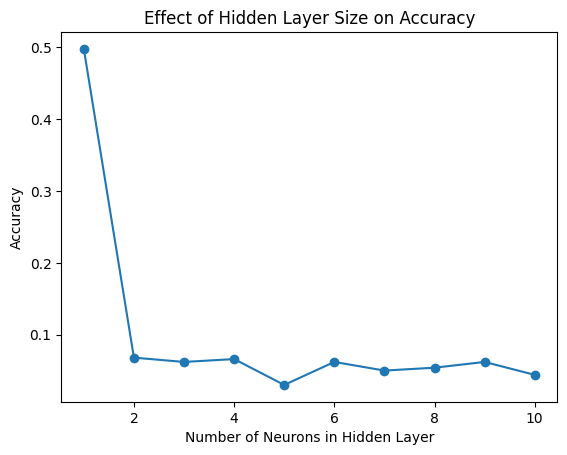

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

# Generate synthetic dataset
X_easy_train, y_easy_train = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=43)
X_easy_test, y_easy_test = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=43)

# Define learning rates and hidden layer sizes
learning_rates = [10**i for i in range(-5, 1)]  # Fine tuning the learning rates
hidden_layer_sizes = [(i,) for i in range(1, 11)]  # Increasing the range of hidden layer sizes

# Effect of Learning Rate on Accuracy
accuracies_lr = []
for lr in learning_rates:
    mlp_classifier = MLPClassifier(learning_rate_init=lr, random_state=43)
    mlp_classifier.fit(X_easy_train, y_easy_train)
    accuracy = mlp_classifier.score(X_easy_test, y_easy_test)
    accuracies_lr.append(accuracy)

plt.plot(learning_rates, accuracies_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Accuracy')
plt.xscale('log')
plt.show()

# Effect of Hidden Layer Size on Accuracy
accuracies_hls = []
for hls in hidden_layer_sizes:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=hls, random_state=43)
    mlp_classifier.fit(X_easy_train, y_easy_train)
    accuracy = mlp_classifier.score(X_easy_test, y_easy_test)
    accuracies_hls.append(accuracy)

plt.plot([hls[0] for hls in hidden_layer_sizes], accuracies_hls, marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Size on Accuracy')
plt.show()
